# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# importing the images(data sets)
# &
# setting the constrains



In [ ]:
# import zipfile
# import os

# zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data2.zip', 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()
import os
import zipfile
import tensorflow as tf

def is_valid_image(file_path):
    try:
        _ = tf.io.decode_image(tf.io.read_file(file_path))
        return True
    except:
        return False

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Open the ZIP file for reading
with zipfile.ZipFile('/content/drive/MyDrive/extocia-data/skin-data.zip', 'r') as zip_ref:

    # Loop over all files in the ZIP archive
    for info in zip_ref.infolist():

        # Check if the file has an image extension
        if os.path.splitext(info.filename)[1][1:].lower() in image_exts:

            # Extract the file to the temporary directory
            extracted_path = os.path.join('/main-data', info.filename)
            zip_ref.extract(info.filename, '/main-data')

            # Check if the image is valid
            if is_valid_image(extracted_path):
                print(f"Valid image: {extracted_path}")
            else:
                print(f"Invalid image: {extracted_path}")
                os.remove(extracted_path)  # Remove the invalid image


Valid image: /main-data/data2/1.sun burns/05-sunburn-Mistakes-You-Make-After-Getting-Sunburn_553096027-Myibean-760x506.jpg
Valid image: /main-data/data2/1.sun burns/088317c5-a4e5-4d2f-896b-023044e7524e_1140x641.jpg
Valid image: /main-data/data2/1.sun burns/0f8fd16a3a541d4a6da35b801c9a17bb.jpg
Valid image: /main-data/data2/1.sun burns/1_PAY-KNM_APPALLING_SUN_BURN_SIZE_OF_TV_1.jpg
Valid image: /main-data/data2/1.sun burns/150728152349-trae-blister-sunburn-irpt.jpg
Valid image: /main-data/data2/1.sun burns/2_PAY-GRUESOME_SUN_BURN_DN08.jpg
Valid image: /main-data/data2/1.sun burns/20170817_095200.png
Valid image: /main-data/data2/1.sun burns/220px-Sun_burn.JPG.jpg
Valid image: /main-data/data2/1.sun burns/2257-pretty-bad-sunburn.jpg
Valid image: /main-data/data2/1.sun burns/2525373.jpg
Valid image: /main-data/data2/1.sun burns/37.jpg
Valid image: /main-data/data2/1.sun burns/374504f3fc71770fa4ffb4e3a952c7cc.jpg
Valid image: /main-data/data2/1.sun burns/54cac758d6928_-_sunburn-3-0611-xln.jp

In [ ]:
#len(os.listdir('/main-data/data2/1.sun burns'))

# installing
# &
# importing libraries

In [ ]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import splitfolders
import os

In [ ]:
#!rm -r 'output'


# Splitting the data

In [ ]:
'''
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')
'''

In [ ]:
loc = '/main-data/data2'

splitfolders.ratio(loc,output ="output",ratio = (0.80,.1,.1))

Copying files: 1045 files [00:00, 5453.12 files/s]


In [ ]:

def random_image(val_dir,val_class):
    folder = val_dir +val_class
    random_image = random.sample(os.listdir(folder),1)
    img = mping.imread(folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(val_class)
    return img

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "./output/train"
test_dir =  "./output/test"
val_dir = "./output/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 8,
                                         shuffle = True,seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 8,
                                         shuffle = False,seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 8,
                                         shuffle = False,seed = 42)

Found 834 files belonging to 5 classes.
Found 109 files belonging to 5 classes.
Found 102 files belonging to 5 classes.


# Image visulize

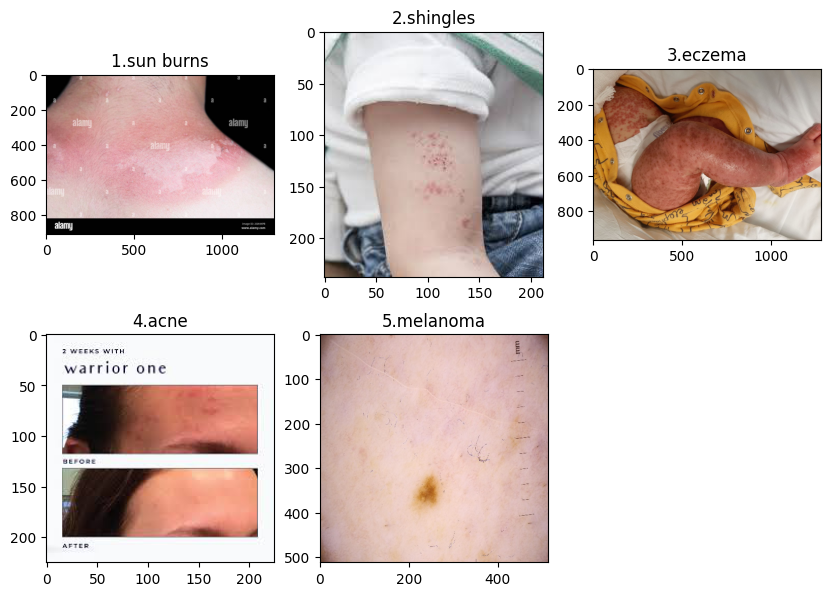

In [ ]:

fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,3,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "1.sun burns")
fig.add_subplot(2,3,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "2.shingles")
fig.add_subplot(2,3,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "3.eczema")
fig.add_subplot(2,3,4)
img4 = random_image(val_dir = "./output/val/",val_class = "4.acne")
fig.add_subplot(2,3,5)
img4 = random_image(val_dir = "./output/val/",val_class = "5.melanoma")

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 6,
                                             min_delta = 0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",factor = 0.2,
                                                patience = 4,min_lr = 1e-7)

In [ ]:
model = tf.keras.applications.EfficientNetB7(include_top = False)
model.trainable = False

258076736/258076736 [==============================] - 12s 0us/step


# Model preprocess

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_aug = tf.keras.Sequential([
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal")
],name = "data_augmentation_layer")

# Model implementation

In [ ]:
inputs = layers.Input(shape = (224,224,3),name = "input_layer")
x = data_aug(inputs)
x = model(x)
x = layers.GlobalAvgPool2D(name = "pooling_layer")(x)
# parameter used to specify the size of the output generated from the layer.
x = layers.Dense(8,activation = "relu",kernel_initializer = tf.keras.initializers.he_normal())(x)
x = layers.Dense(5)(x)
outputs = layers.Activation("softmax",dtype = tf.float32)(x)
model = tf.keras.Model(inputs,outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 pooling_layer (GlobalAverag  (None, 2560)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
 dense_1 (Dense)             (None, 5)                 45    

In [ ]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = ["accuracy"])

# Train the model

In [ ]:
history_1 = model.fit(train_data,epochs =20 , validation_data = val_data,
                      callbacks = [early_stop,reduce_lr])

Epoch 1/20
105/105 [==============================] - 57s 208ms/step - loss: 0.9041 - accuracy: 0.6787 - val_loss: 0.5511 - val_accuracy: 0.8137 - lr: 0.0010
Epoch 2/20
105/105 [==============================] - 17s 161ms/step - loss: 0.4571 - accuracy: 0.8657 - val_loss: 0.4624 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 3/20
105/105 [==============================] - 16s 153ms/step - loss: 0.3519 - accuracy: 0.8885 - val_loss: 0.3967 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 4/20
105/105 [==============================] - 17s 161ms/step - loss: 0.2901 - accuracy: 0.9125 - val_loss: 0.3545 - val_accuracy: 0.8627 - lr: 0.0010
Epoch 5/20
105/105 [==============================] - 17s 161ms/step - loss: 0.2563 - accuracy: 0.9317 - val_loss: 0.3025 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/20
105/105 [==============================] - 16s 151ms/step - loss: 0.2454 - accuracy: 0.9293 - val_loss: 0.2946 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/20
105/105 [==============================] 

#1-Test Measurment

1.1-Testing Accuracy

In [ ]:
print("Testing Accuracy",model.evaluate(test_data))


14/14 [==============================] - 2s 171ms/step - loss: 0.3073 - accuracy: 0.9083
Testing Accuracy [0.307297945022583, 0.9082568883895874]


1.2-Accuracy Visualization

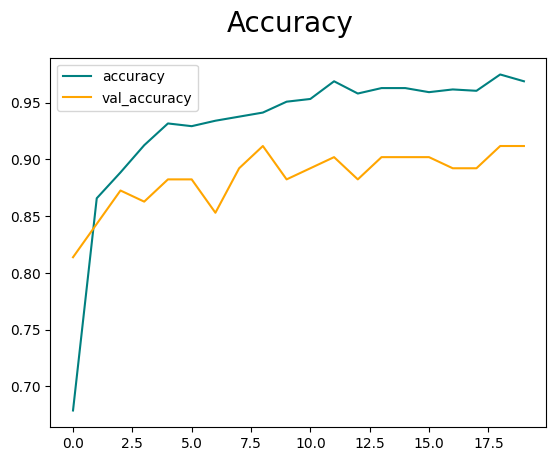

In [ ]:

fig = plt.figure()
plt.plot(history_1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

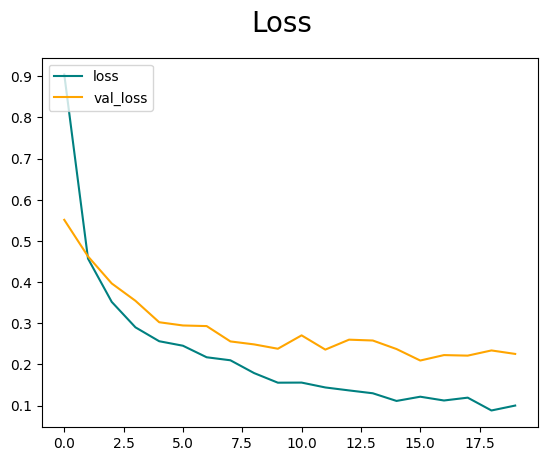

In [ ]:

fig = plt.figure()
plt.plot(history_1.history['loss'], color='teal', label='loss')
plt.plot(history_1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 2-Main Measurment

1-confusion Matrix

14/14 [==============================] - 7s 100ms/step


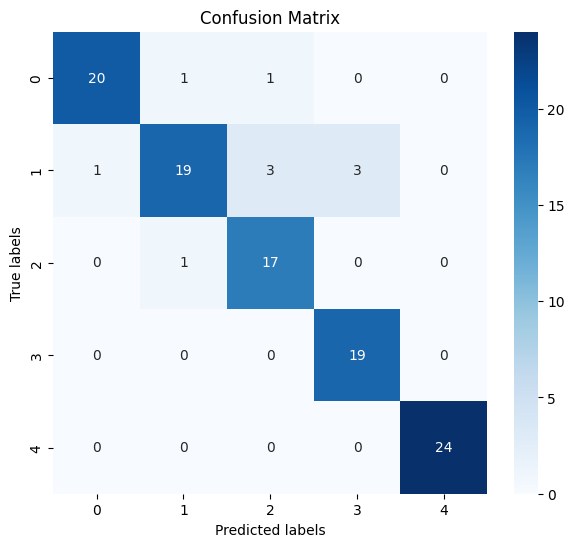

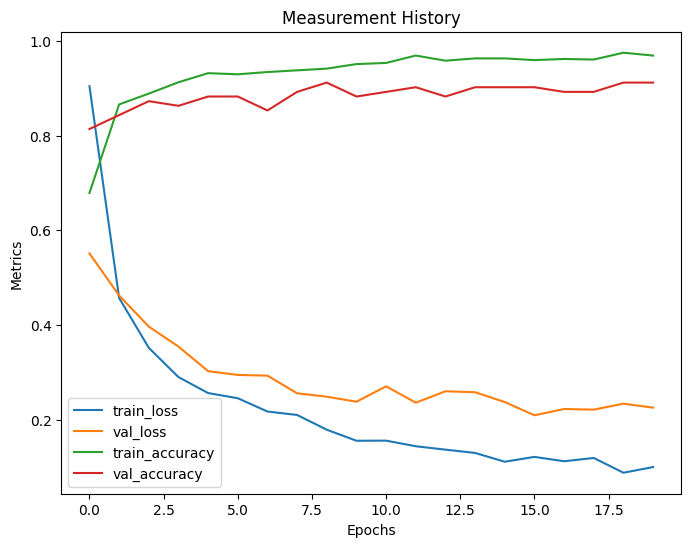

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)

# Predict the classes of the test set and convert them to a numpy array
y_pred = np.argmax(model.predict(test_data), axis=-1)

# Get the true labels of the test set and convert them to a numpy array
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_true = np.argmax(y_true, axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the measurement history
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['loss'], label='train_loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.plot(history_1.history['accuracy'], label='train_accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Measurement History')
plt.show()

Macro-average F1 score: 0.9074734673049925
Micro-average F1 score: 0.908256880733945
Accuracy: 0.908256880733945
Macro-average precision: 0.9060606060606062
Micro-average precision: 0.908256880733945
Error: 0.09174311926605505


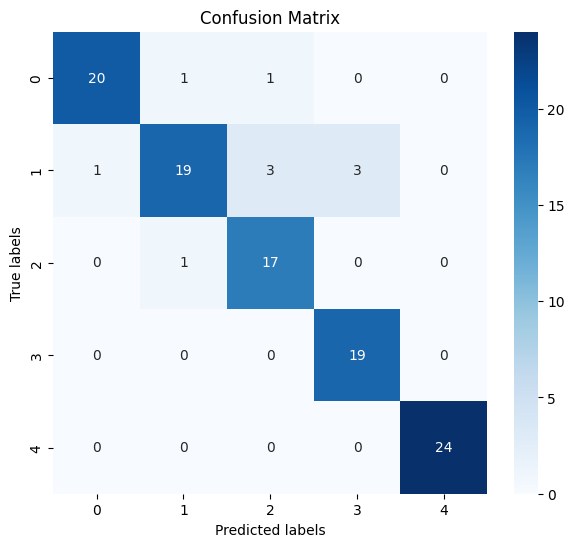

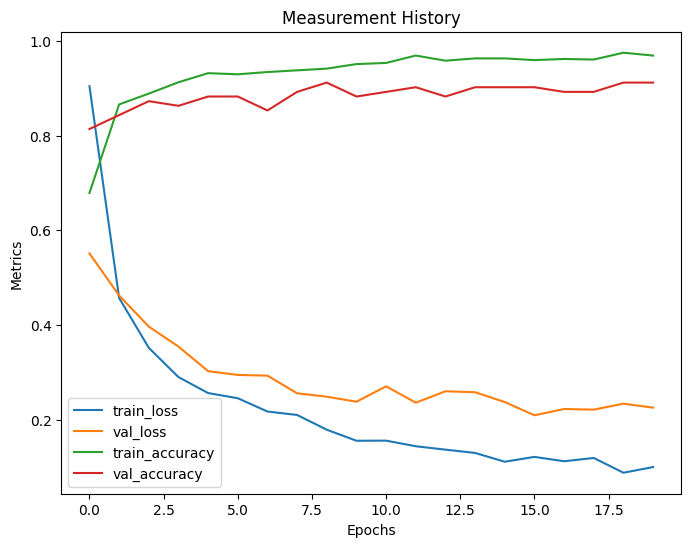

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix

# Calculate F1 score
f1_macro = f1_score(y_true, y_pred, average='macro')  # Macro-average F1 score
f1_micro = f1_score(y_true, y_pred, average='micro')  # Micro-average F1 score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision_macro = precision_score(y_true, y_pred, average='macro')  # Macro-average precision
precision_micro = precision_score(y_true, y_pred, average='micro')  # Micro-average precision

# Calculate error (1 - accuracy)
error = 1 - accuracy

# Print the results
print("Macro-average F1 score:", f1_macro)
print("Micro-average F1 score:", f1_micro)
print("Accuracy:", accuracy)
print("Macro-average precision:", precision_macro)
print("Micro-average precision:", precision_micro)
print("Error:", error)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Assuming you have history variable for training history
# Plot the measurement history
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['loss'], label='train_loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.plot(history_1.history['accuracy'], label='train_accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Measurement History')
plt.show()


In [ ]:

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'drive', 'output', 'sample_data']


setting the model for testing & prediction

In [ ]:

model.save_weights('model_weights.h5')


In [ ]:

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/sample-data/test-data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/testing-data') #Extracts the files into the /main-data folder
zip_ref.close()


predection

In [ ]:

import cv2
model.load_weights('model_weights.h5')

class_names = {
    0: 'sun burns',
    1: 'shingles',
    2: 'eczema',
    3: 'acne',
    4: 'melanoma',
    # Add more class names here if needed
}

# Load the sample test data
test_image = cv2.imread('/testing-data/testing data/melanoma/031.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=0)

# Predict the class probabilities for the test image
class_probabilities = model.predict(test_image)[0]

# Get the class labels and probabilities sorted in descending order
sorted_indices = np.argsort(class_probabilities)[::-1]
sorted_probabilities = class_probabilities[sorted_indices]
sorted_class_labels = [class_names[i] for i in sorted_indices]

# Print the class labels and corresponding prediction percentages
for i in range(len(sorted_class_labels)):
    print("Class:", sorted_class_labels[i])
    print("Prediction Percentage:", round(sorted_probabilities[i] * 100, 2), "%")
    print()

# Get the class label with the highest probability
class_label = sorted_indices[0]

# Get the class name corresponding to the predicted label
class_name = class_names[class_label]

print("The predicted class label is:", class_label, class_name)

1/1 [==============================] - 8s 8s/step
Class: melanoma
Prediction Percentage: 99.97 %

Class: shingles
Prediction Percentage: 0.03 %

Class: eczema
Prediction Percentage: 0.0 %

Class: sun burns
Prediction Percentage: 0.0 %

Class: acne
Prediction Percentage: 0.0 %

The predicted class label is: 4 melanoma


converting the model

In [ ]:
'''
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] #optimization
tflite_quant_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_quant_model)
'''